## Final Project Submission

Please fill out:
* Student name: WAFULA SIMIYU
* Student pace: self paced / part time / full time - PART-TIME
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Importing necessary modules

To begin our analysis, we'll import the necessary Python modules. We'll also create aliases for these modules to simplify our code.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sqlite3

# Data preparation

Next, we'll proceed to prepare the data by adding the datasets and examining them to determine which information is pertinent for our analysis. We'll utilize the pd.read function specific to each file type to import the files. Subsequently, we'll create dataframes to store the datasets, making the data accessible and manageable using Pandas.

In [3]:
mojo_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#Displaying part of the dataframe

with pd.option_context('display.max_rows', 20, 'display.max_columns', 5):
    print(mojo_df)
    

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [5]:
# a summary of the datafarame created and the datatypes, number of columns and rows, null values

mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#Description of the above information

title is the name of the movie.

studio - the production house.

foreign_gross and domestic_gross - income in home market and international market.

year - the year the movie was released.

note that:
1.foreign_gross is a str, should be int.
2.missing values are noted in the studio, domestic_gross and foreign_gross columns.

In [6]:
# Missing Data Management

mojo_df.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

-The above information allows us to assess the amount of missing data we are working with as follows:
-For the studio column, due to ths small number the affected rows can be removed as the effect will be insignificant to the overall data.
-Foreign_gross has the largest number of null values while the studio the smallest number of null values.


In [7]:
# Studio Column

# checking weight in percentage of the missing data in studio column
mojo_df["studio"].isnull().mean() * 100
0.14762326542663123

# Dropping rows with missing values from the 'studio' column
mojo_df.dropna(subset=['studio'], inplace=True)

# Check if there are any missing values left in the 'studio' column
mojo_df['studio'].isnull().sum()


0

In the foreign_gross Column, replace missing values with 0 to show no foreign income.


In [8]:
mojo_df["foreign_gross"].tail(20)

3367    NaN
3368    NaN
3369    NaN
3370    NaN
3371    NaN
3372    NaN
3373    NaN
3374    NaN
3375    NaN
3376    NaN
3377    NaN
3378    NaN
3379    NaN
3380    NaN
3381    NaN
3382    NaN
3383    NaN
3384    NaN
3385    NaN
3386    NaN
Name: foreign_gross, dtype: object

In [9]:
mojo_df["foreign_gross"].fillna(0, inplace=True)
mojo_df["foreign_gross"].tail(20)

3367    0
3368    0
3369    0
3370    0
3371    0
3372    0
3373    0
3374    0
3375    0
3376    0
3377    0
3378    0
3379    0
3380    0
3381    0
3382    0
3383    0
3384    0
3385    0
3386    0
Name: foreign_gross, dtype: object

For the domestic_gross Column - replace missing values with 0 to show no foreign income.

In [10]:
mojo_df["domestic_gross"].fillna(0, inplace=True)
mojo_df["domestic_gross"].iloc[926:966]

928          0.0
929    2600000.0
930    4300000.0
931    1000000.0
932    4099999.0
934    4000000.0
935    3400000.0
936          0.0
937     355000.0
938     354000.0
939      23400.0
940    3700000.0
941    2000000.0
942      75700.0
943    3300000.0
944    3100000.0
945    3100000.0
946    3000000.0
947      69100.0
948    2900000.0
949    2800000.0
950     192000.0
951    2700000.0
952     151000.0
953    2600000.0
954    2500000.0
955    1500000.0
956    2400000.0
957    2300000.0
958     351000.0
959     304000.0
960    2000000.0
961     898000.0
962    2000000.0
963       3500.0
964    1900000.0
965    1800000.0
966          0.0
967      11000.0
968     138000.0
Name: domestic_gross, dtype: float64

In [11]:
mojo_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#To be able to calculate the income, we will change the datatyoe of foreign_gross column

In [12]:
mojo_df["foreign_gross"] = pd.to_numeric(mojo_df["foreign_gross"], errors="coerce")
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3377 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [13]:
# displaying the affected rows

fg_missing = mojo_df[mojo_df["foreign_gross"].isna()]
fg_missing

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015
1873,Jurassic World,Uni.,652300000.0,NaN,2015
1874,Furious 7,Uni.,353000000.0,NaN,2015
2760,The Fate of the Furious,Uni.,226000000.0,NaN,2017
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018


In [14]:
# creating the new figures to replace NaN
# this will replace the missing figures with correct values

fg_missing_dict = {"Star Wars: The Force Awakens": 1134647993,
                   "Jurassic World": 1018130819, 
                   "Furious 7": 1162334379, 
                   "The Fate of the Furious": 1009996733, 
                   "Avengers: Infinity War": 1373599557}

In [15]:
# use a for loop to update the values
# it assigns the key to the title and the value to the figure
# locate the key and value in the DataFrame
for index, (key, value) in enumerate(fg_missing_dict.items()):
     mojo_df.loc[mojo_df.title == key, 'foreign_gross'] = value

In [16]:
# testing the changes
mojo_df[mojo_df['title'] == "The Fate of the Furious"]

,title,studio,domestic_gross,foreign_gross,year
2760,The Fate of the Furious,Uni.,226000000.0,1.009997e+09,2017


In [17]:
mojo_df.info()
mojo_df.iloc[1868:1873]

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1.134648e+09,2015
1873,Jurassic World,Uni.,652300000.0,1.018131e+09,2015
1874,Furious 7,Uni.,353000000.0,1.162334e+09,2015
1875,Avengers: Age of Ultron,BV,459000000.0,9.464000e+08,2015
1876,Minions,Uni.,336000000.0,8.234000e+08,2015


foreign_gross is a str. However it should be an int thus the coversion.

In [18]:
# converting foreign_gross to int64 for readability

mojo_df["foreign_gross"] = mojo_df["foreign_gross"].astype("int64")
mojo_df.iloc[1868:1873]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1134647993,2015
1873,Jurassic World,Uni.,652300000.0,1018130819,2015
1874,Furious 7,Uni.,353000000.0,1162334379,2015
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
1876,Minions,Uni.,336000000.0,823400000,2015


Creating a new column
The new column is "gross_income" 

this is done by summing up the "domestic_gross" and "foreign_gross" columns can be beneficial for several reasons:

Data Consolidation: It consolidates related information into a single column, making it easier to analyze and interpret.

Analysis Convenience: It simplifies analysis by providing a single metric (gross income) instead of having to consider multiple separate columns.

Visualization: It enables the visualization of the combined gross income, which may reveal patterns or trends that are not immediately evident when looking at the individual components separately.

Calculation Efficiency: Pre-calculating the gross income and storing it in a new column can improve computational efficiency, especially if you need to perform calculations or analysis involving gross income frequently.Creating a new column like "gross_income" by summing up the "domestic_gross" and "foreign_gross" columns can be beneficial for several reasons:

Data Consolidation: It consolidates related information into a single column, making it easier to analyze and interpret.

Analysis Convenience: It simplifies analysis by providing a single metric (gross income) instead of having to consider multiple separate columns.

Visualization: It enables the visualization of the combined gross income, which may reveal patterns or trends that are not immediately evident when looking at the individual components separately.

Calculation Efficiency: Pre-calculating the gross income and storing it in a new column can improve computational efficiency, especially if you need to perform calculations or analysis involving gross income frequently.

In [19]:
#create a new column 'gross_income'
mojo_df["gross_income"] = mojo_df["domestic_gross"] + mojo_df["foreign_gross"]
mojo_df

,title,studio,domestic_gross,foreign_gross,year,gross_income
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0,2018,2.400000e+03


In [20]:
# Convert the "gross_income" column to int64

mojo_df["gross_income"] = pd.to_numeric(mojo_df["gross_income"], errors="coerce", downcast="integer")

mojo_df

,title,studio,domestic_gross,foreign_gross,year,gross_income
0,Toy Story 3,BV,415000000.0,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,960300000
3,Inception,WB,292600000.0,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,752600000
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018,6200
3383,Edward II (2018 re-release),FM,4800.0,0,2018,4800
3384,El Pacto,Sony,2500.0,0,2018,2500
3385,The Swan,Synergetic,2400.0,0,2018,2400


Selecting the columns to keep

In [21]:
# Reorder the columns
mojo_df = mojo_df.loc[:, ["title", "studio", "gross_income"]]

# Display information about the DataFrame
mojo_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3382 non-null   object
 1   studio        3382 non-null   object
 2   gross_income  3382 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 92.5+ KB


Database Dataset
Read the CSV file and display the first five rows by using the iloc indexer to select the first five rows after reading the file with pd.read_csv():

In [22]:
# Read the CSV file
moviedb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)

# Display the first five rows
moviedb_df.iloc[:5]


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
# Display summary information from the dataframe created
print(moviedb_df.describe())
print(moviedb_df.info())


                  id    popularity  vote_average    vote_count
count   26517.000000  26517.000000  26517.000000  26517.000000
mean   295050.153260      3.130912      5.991281    194.224837
std    153661.615648      4.355229      1.852946    960.961095
min        27.000000      0.600000      0.000000      1.000000
25%    157851.000000      0.600000      5.000000      2.000000
50%    309581.000000      1.374000      6.000000      5.000000
75%    419542.000000      3.694000      7.000000     28.000000
max    608444.000000     80.773000     10.000000  22186.000000
<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  fl

This dataset appears to be well-structured, with no missing values, indicating that it's relatively clean. However, to gain deeper insights, further exploration is needed to understand the content of the genre_ids column. 
Each integer in this column likely corresponds to a specific genre category, but without additional information, it's challenging to interpret these values accurately. 
Therefore, a more in-depth analysis is necessary to decode the genre representation within these lists of integers. Additionally, exploring potential relationships between movie genres and other variables could provide valuable insights for subsequent analysis and decision-making

In [24]:
moviedb_df.isna().sum()


genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [25]:
#select the columns to keep

moviedb_df = moviedb_df[['title', 'vote_average']]
moviedb_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


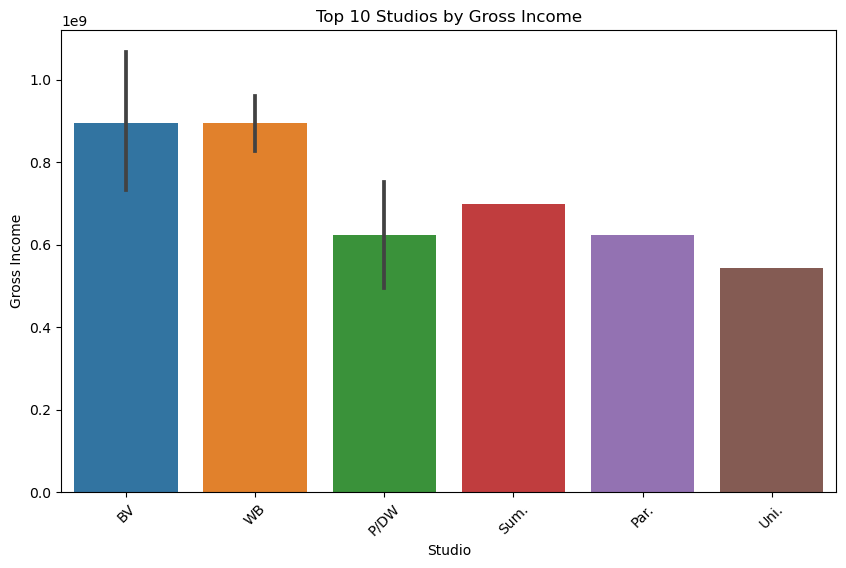

In [26]:
# Visualization for mojo_df
plt.figure(figsize=(10, 6))
sns.barplot(x='studio', y='gross_income', data=mojo_df.head(10))
plt.title('Top 10 Studios by Gross Income')
plt.xlabel('Studio')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)
plt.show()


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


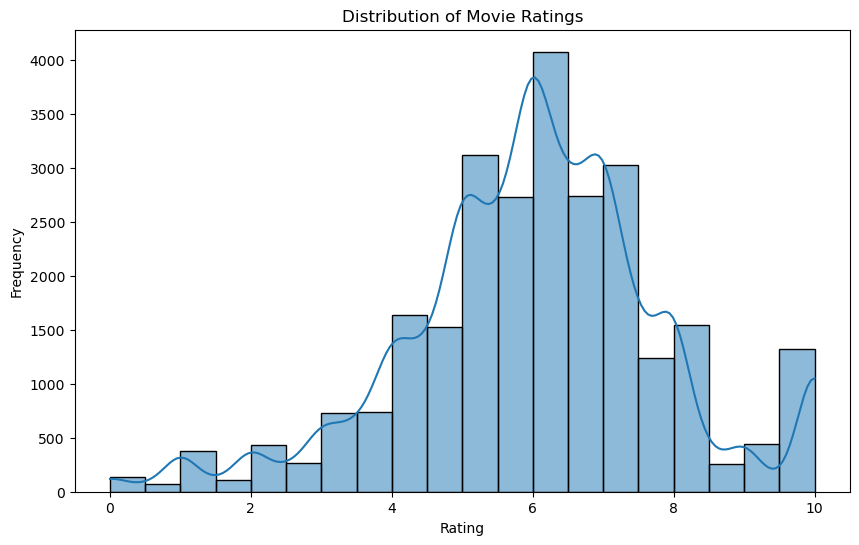

In [27]:
# Visualization for moviedb_df
plt.figure(figsize=(10, 6))
sns.histplot(moviedb_df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()